In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
stud_score = pd.read_csv('datasets/student_performance.csv')
stud_score.head()

,Hours Studied,Score Obtained,Outliers
0,22,0.869736,False
1,26,0.912112,False
2,45,1.143020,False
3,46,1.156660,False
4,50,1.212843,False


In [3]:
stud_score.shape

(122, 3)

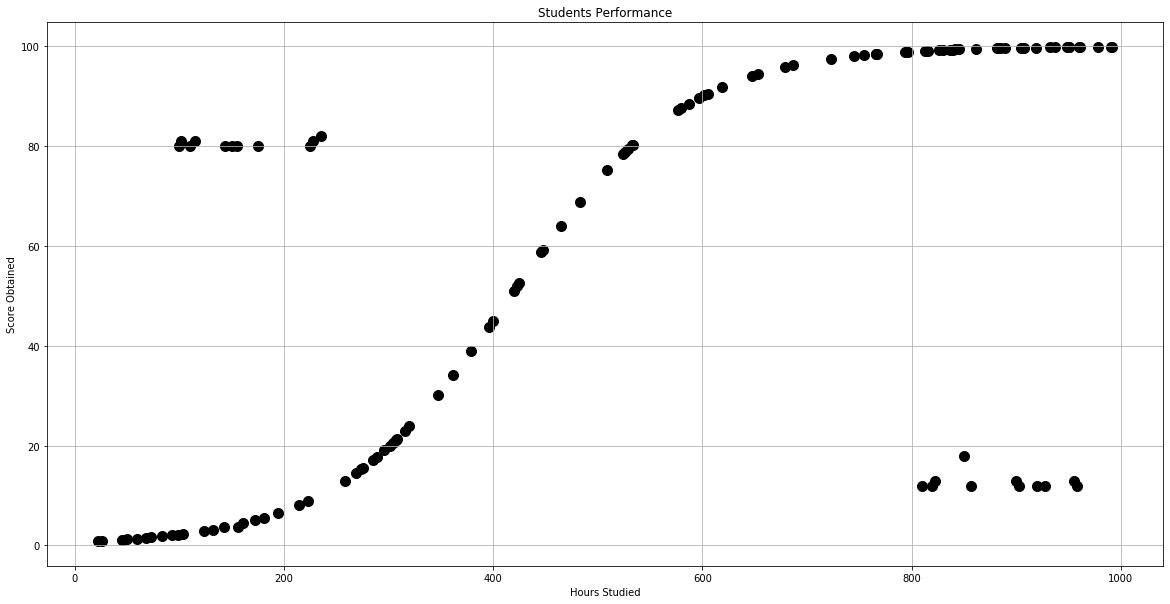

In [4]:
fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(stud_score['Hours Studied'],
            stud_score['Score Obtained'],
            color= 'black',
            s= 100)
ax.set(xlabel= 'Hours Studied',
       ylabel= 'Score Obtained',
       title= 'Students Performance')
ax.grid()
plt.show()

In [5]:
stud_score.groupby('Outliers').size()

Outliers
False    100
True      22
dtype: int64

In [6]:
X = stud_score.drop('Outliers', axis= 1)
X.head()

,Hours Studied,Score Obtained
0,22,0.869736
1,26,0.912112
2,45,1.143020
3,46,1.156660
4,50,1.212843


### local outlier factor

In [7]:
from sklearn.neighbors import LocalOutlierFactor

In [8]:
lof = LocalOutlierFactor(n_neighbors= 20,
                         contamination= 0.2)

In [9]:
y_pred = lof.fit_predict(X)
y_pred

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1])

In [10]:
n_outliers = (y_pred == -1).sum()
n_outliers

25

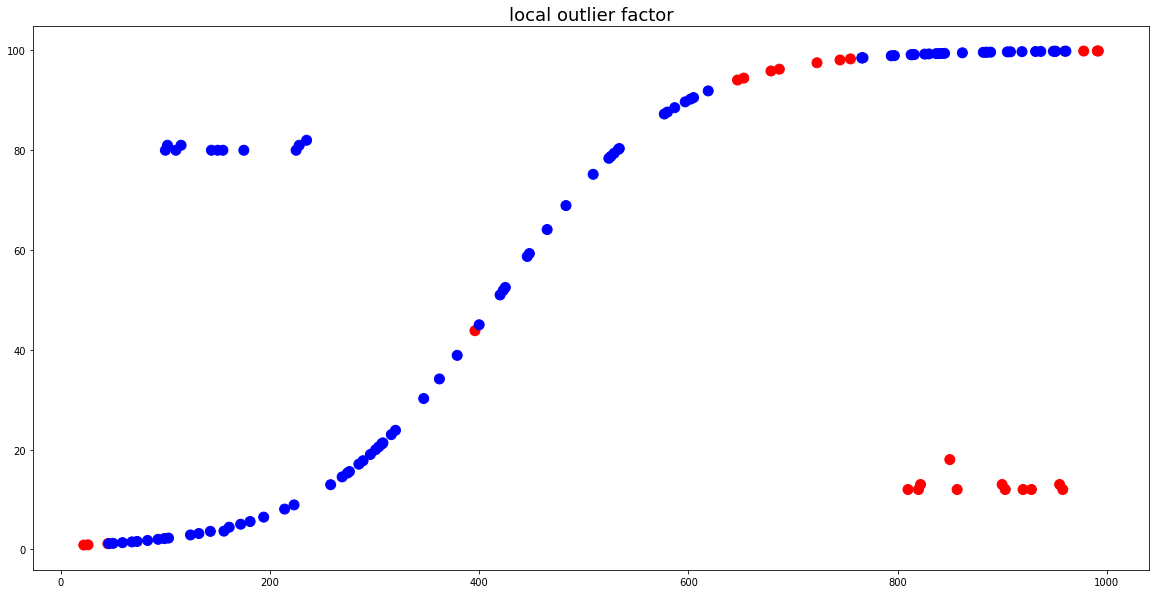

In [11]:
colors = np.array(['r', 'b'])

fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(stud_score['Hours Studied'],
            stud_score['Score Obtained'],
            color= colors[(y_pred + 1) // 2],
            s= 100)
plt.title('local outlier factor', size= 18)
plt.show()

In [12]:
x_scores = lof.negative_outlier_factor_
x_scores

array([-1.14317945, -1.12665573, -1.0567161 , -1.05368781, -1.04373738,
       -1.02975328, -1.02410918, -1.02484211, -1.02727546, -1.02988938,
       -1.03039928, -0.98395541, -0.97939208, -1.01269424, -0.96696018,
       -0.96737591, -0.99460791, -0.97612705, -0.95809487, -1.01195749,
       -1.01531276, -1.02251399, -0.95511057, -0.95961389, -0.96145326,
       -1.02771782, -0.96891175, -0.97850146, -0.98619115, -0.99666125,
       -0.99361717, -0.99170612, -0.99282767, -1.0128736 , -1.00195489,
       -1.00102812, -1.00025359, -0.9905836 , -0.98924894, -0.97888615,
       -0.97709147, -0.97796595, -0.98004792, -0.98004792, -0.98118573,
       -0.98656031, -0.98884869, -1.01038906, -1.04174962, -1.04964314,
       -1.05547725, -1.04610136, -1.03406249, -1.01951322, -1.02146054,
       -1.03259426, -1.01717545, -1.02345066, -1.02929812, -1.03763217,
       -1.02886507, -1.02886507, -1.030146  , -1.03107404, -1.03100017,
       -1.02456492, -1.02425818, -1.02938883, -1.04024032, -1.04

In [13]:
#scaling to range 0-1
radius = (x_scores.max()-x_scores) / (x_scores.max()-x_scores.min())

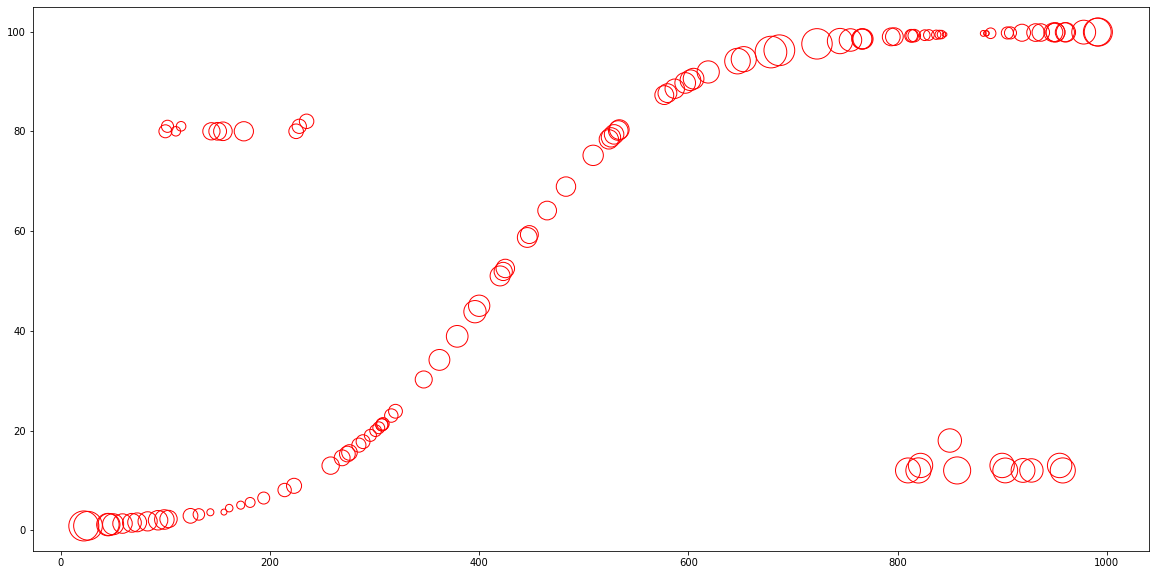

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(stud_score['Hours Studied'],
            stud_score['Score Obtained'],
            s= 1000* radius,
            edgecolors = 'r',
            facecolors= 'none',
            label= 'oulier scores')
plt.show()

### isolation forest

In [15]:
from sklearn.ensemble import IsolationForest

In [16]:
isf = IsolationForest(behaviour= 'new',
                      contamination= 0.19)

In [17]:
y_pred = isf.fit_predict(X)
y_pred

array([-1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1, -1, -1])

In [18]:
n_outliers = (y_pred == -1).sum()
n_outliers

23

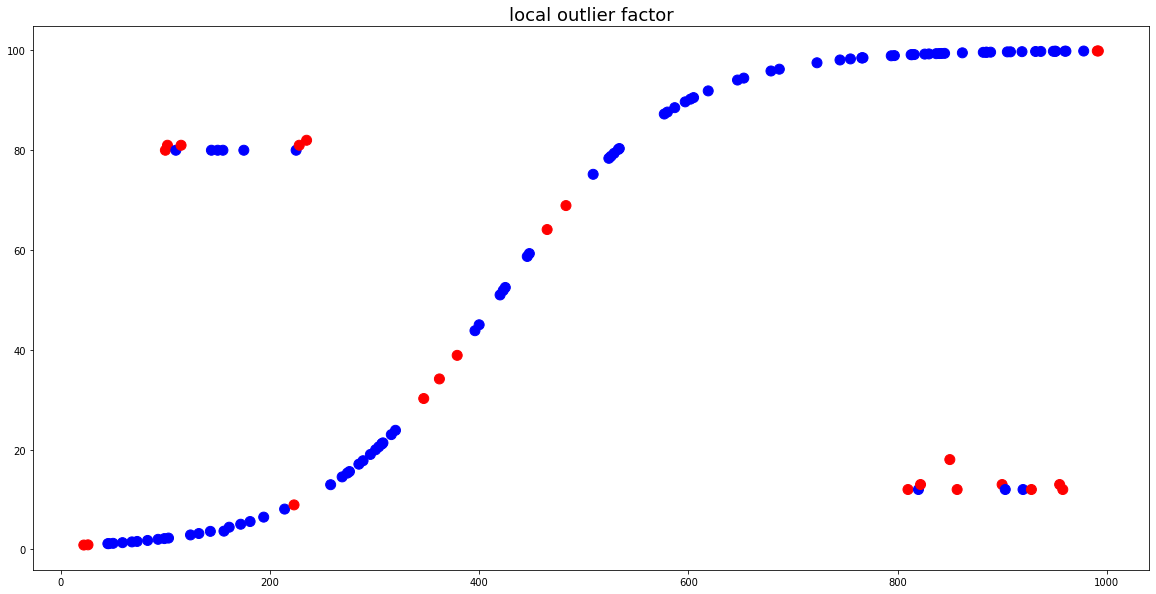

In [19]:
colors = np.array(['r', 'b'])

fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(stud_score['Hours Studied'],
            stud_score['Score Obtained'],
            color= colors[(y_pred + 1) // 2],
            s= 100)
plt.title('local outlier factor', size= 18)
plt.show()

In [20]:
stud_score.describe()

,Hours Studied,Score Obtained
count,122.000000,122.000000
mean,519.131148,56.665412
std,316.030884,39.929084
min,22.000000,0.869736
25%,225.750000,13.000000
50%,525.000000,78.582806
75%,829.000000,98.510907
max,992.000000,99.899724


In [21]:
xx, yy = np.meshgrid(np.linspace(0, 1010, 500),
                     np.linspace(0, 102, 500))
print('xx = ', xx.ravel())
print('yy = ', yy.ravel())

xx =  [   0.            2.0240481     4.04809619 ... 1005.95190381 1007.9759519
 1010.        ]
yy =  [  0.   0.   0. ... 102. 102. 102.]


In [22]:
np.c_[xx.ravel(), yy.ravel()]

array([[   0.        ,    0.        ],
       [   2.0240481 ,    0.        ],
       [   4.04809619,    0.        ],
       ...,
       [1005.95190381,  102.        ],
       [1007.9759519 ,  102.        ],
       [1010.        ,  102.        ]])

In [23]:
Z = isf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

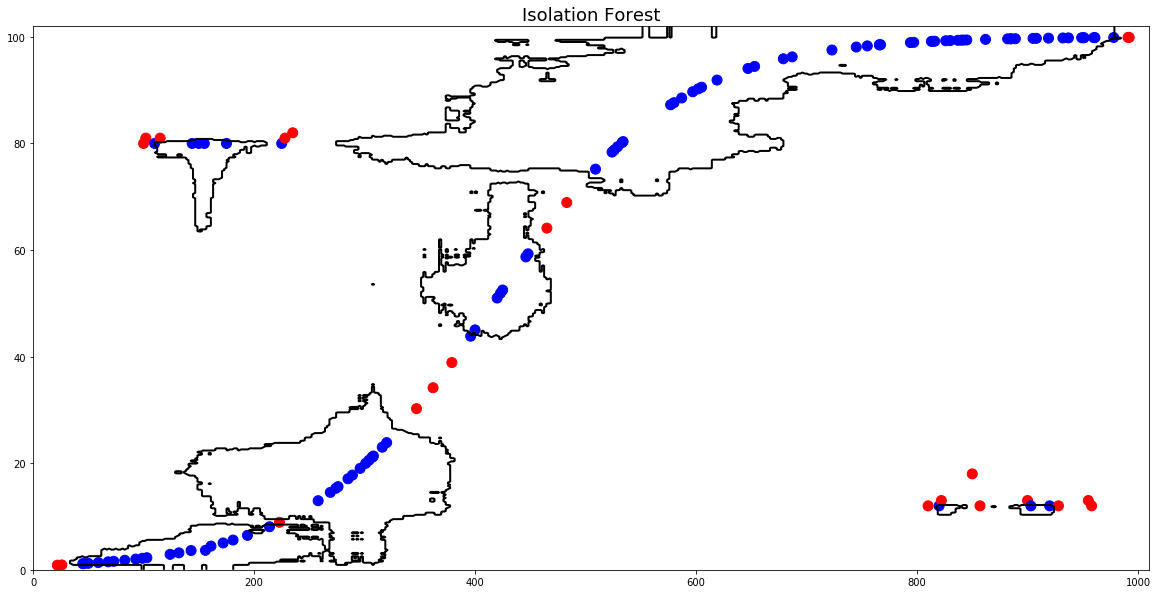

In [24]:
fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(stud_score['Hours Studied'],
            stud_score['Score Obtained'],
            color= colors[(y_pred + 1) // 2],
            s= 100)
plt.contour(xx, yy, Z,
            levels= [0],
            linewidths= 2,
            colors= 'black')

plt.title('Isolation Forest', size= 18)
plt.show()

### Elliptic Envelope

In [25]:
from sklearn.covariance import EllipticEnvelope

In [26]:
ee = EllipticEnvelope(support_fraction= 1., contamination= 0.19)

In [27]:
y_pred = ee.fit_predict(X)
y_pred

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1])

In [28]:
n_outliers = (y_pred == -1).sum()
n_outliers

23

In [29]:
xx, yy = np.meshgrid(np.linspace(0, 1010, 500),
                     np.linspace(-5, 120, 500))
Z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

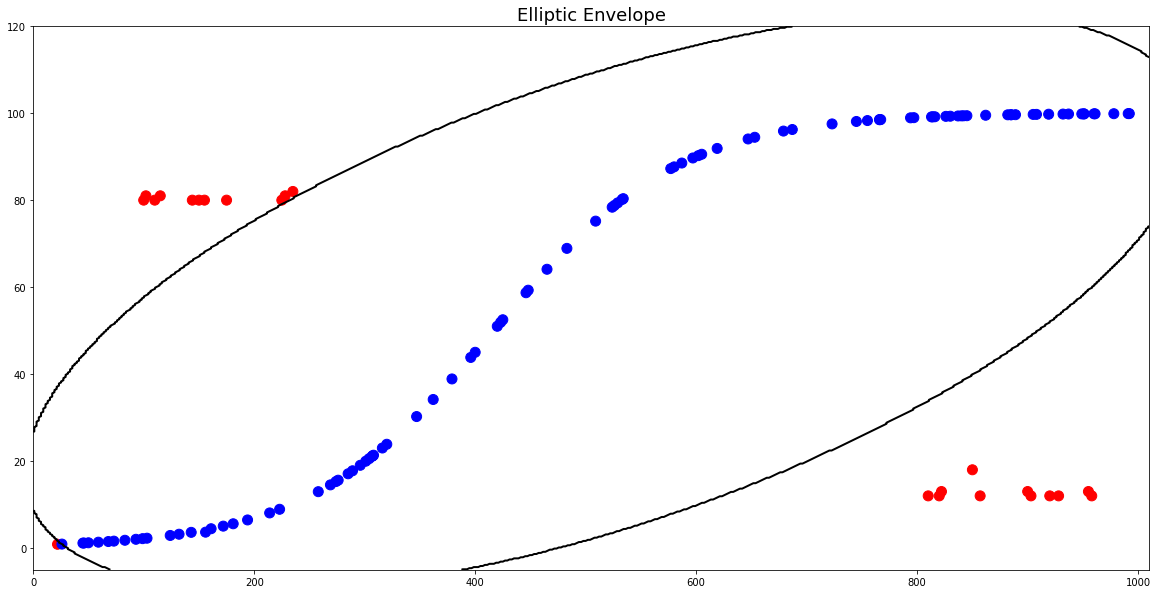

In [30]:
fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(stud_score['Hours Studied'],
            stud_score['Score Obtained'],
            color= colors[(y_pred + 1) // 2],
            s= 100)
plt.contour(xx, yy, Z,
            levels= [0],
            linewidths= 2,
            colors= 'black')

plt.title('Elliptic Envelope', size= 18)
plt.show()

### using predict scores samples and decision function

In [31]:
INLIER = np.array([[500, 99]])
OUTLIER = np.array([[10000, 40000]])

In [32]:
isf.predict(INLIER), isf.predict(OUTLIER)

(array([-1]), array([-1]))

In [33]:
isf.score_samples(INLIER), isf.score_samples(OUTLIER)
#measure of normality of an observation
# smaller depth represent anomalies

(array([-0.54249849]), array([-0.55237888]))

In [34]:
isf.decision_function(INLIER), isf.decision_function(OUTLIER)
# gives average anamoly score

(array([-0.00091489]), array([-0.01079528]))

In [35]:
ee.predict(INLIER), ee.predict(OUTLIER)

(array([1]), array([-1]))

In [36]:
ee.score_samples(INLIER), ee.score_samples(OUTLIER)

(array([-1.87453537]), array([-1503979.60043687]))

In [37]:
ee.decision_function(INLIER), ee.decision_function(OUTLIER)

(array([0.92463624]), array([-1503976.80126526]))